<a href="https://colab.research.google.com/github/Dck126/Tugas_Machine_Learning/blob/main/Tugas02_ML_H071191060_Dicky_Ikbal_Pratama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Import data
df = pd.read_csv('k-means.csv')
#  Tampilkan 5 data pertama
df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [42]:
# hapus atribut yang tidak digunakan
df.drop(['name'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [43]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['age', 'income']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(22, 2)

In [44]:
df_scale[:5]

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653]])

In [45]:
data = pd.DataFrame(df_scale)
data.columns = ['age',	'income']

data_cluster = data.copy()
data.head()

,age,income
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


In [46]:
data.describe() 

,age,income
count,2.200000e+01,2.200000e+01
mean,-3.482063e-16,1.463476e-16
std,1.023533e+00,1.023533e+00
min,-1.529504e+00,-1.068841e+00
25%,-1.009157e+00,-7.512363e-01
50%,2.917096e-01,-5.394999e-01
75%,8.554186e-01,1.054404e+00
max,1.419128e+00,1.683732e+00


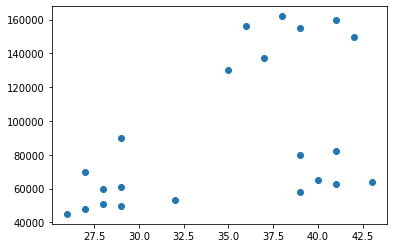

In [47]:
plt.scatter(df['age'],df['income'])

In [48]:
# Menentukan jumlah cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [69]:
#menampilkan cluster
df['cluster']=y_predicted
df.head()

,age,income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [72]:
km.cluster_centers_

array([[2.65000000e+01, 4.65000000e+04],
       [3.95000000e+01, 1.61000000e+05],
       [4.00000000e+01, 8.10000000e+04],
       [3.77500000e+01, 6.55000000e+04],
       [3.60000000e+01, 1.33500000e+05],
       [2.90000000e+01, 9.00000000e+04],
       [3.90000000e+01, 1.53666667e+05],
       [2.96666667e+01, 5.11666667e+04],
       [3.20000000e+01, 5.96666667e+04]])

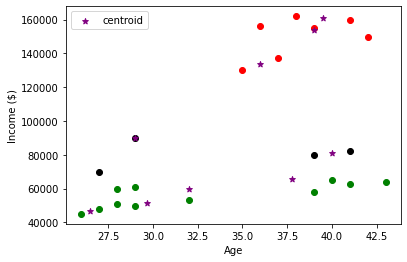

In [73]:
#KMeans Model Creation and Training 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

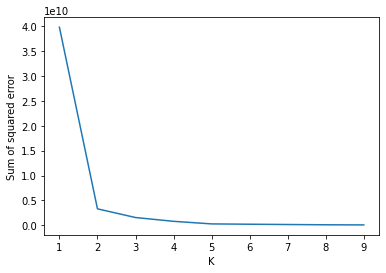

In [63]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

# mengubah hasil menjadi kerangka data dan memplotnya
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Hierarchy


In [74]:
data

,age,income
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [75]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

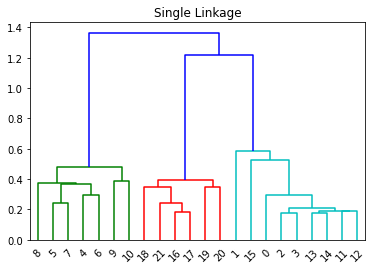

In [76]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

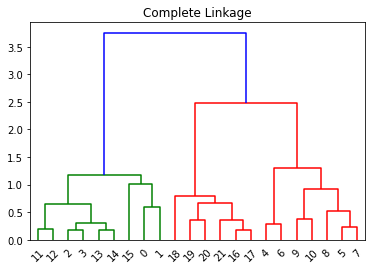

In [77]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [78]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [79]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,age,income,cluster_hierarchy
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1
5,0.725332,1.519048,1
6,1.072230,1.636679,1
7,0.551883,1.683732,1
8,0.204985,1.542574,1
9,0.031536,0.930891,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

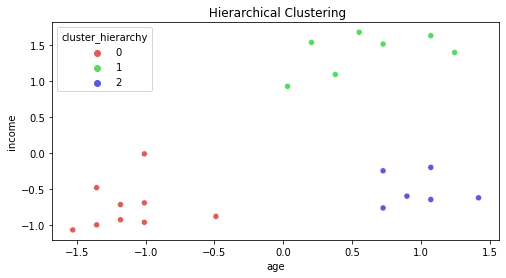

In [81]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['age'], data_cluster['income'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
data

,age,income
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [84]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [85]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,age,income,cluster_hierarchy,cluster_dbscan
0,-1.356055,-0.480684,0,0
1,-1.009157,-0.010159,0,0
2,-1.009157,-0.692421,0,0
3,-1.182606,-0.715947,0,0
4,1.245679,1.401417,1,1
5,0.725332,1.519048,1,1
6,1.072230,1.636679,1,1
7,0.551883,1.683732,1,1
8,0.204985,1.542574,1,1
9,0.031536,0.930891,1,1


In [86]:
data_cluster.describe()

,age,income,cluster_hierarchy,cluster_dbscan
count,2.200000e+01,2.200000e+01,22.000000,22.000000
mean,-3.482063e-16,1.463476e-16,0.863636,0.863636
std,1.023533e+00,1.023533e+00,0.833550,0.833550
min,-1.529504e+00,-1.068841e+00,0.000000,0.000000
25%,-1.009157e+00,-7.512363e-01,0.000000,0.000000
50%,2.917096e-01,-5.394999e-01,1.000000,1.000000
75%,8.554186e-01,1.054404e+00,1.750000,1.750000
max,1.419128e+00,1.683732e+00,2.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

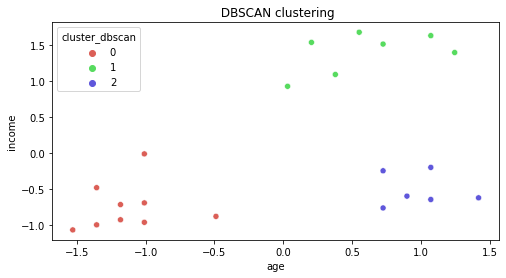

In [88]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['age'], data_cluster['income'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')